In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import logomaker

import warnings
warnings.filterwarnings("ignore")

# AP sites frequency on different trinucleotides

## Plot trinucleotides logos

Triplet here means exactly that triplet that become abasic, i.e. they are strand-specific

nuc,A,C,G,T
pos,,,,
0,0.055536,0.407082,0.370119,0.167264
1,0.280973,0.204197,0.367919,0.146911
2,0.251717,0.190287,0.355978,0.202018


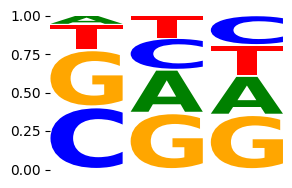

In [51]:
df_heavy = pd.read_csv("../../data/abasic_sites/AbasicSitesMtDNAcontext_start_heavy.csv", sep=";").sort_values("avg")

df_heavy[0] = df_heavy['triplet'].str.get(0).str.capitalize()
df_heavy[1] = df_heavy['triplet'].str.get(1).str.capitalize()
df_heavy[2] = df_heavy['triplet'].str.get(2).str.capitalize()
df_h = df_heavy.melt(['triplet', "avg"], [0, 1, 2], "pos", "nuc")

df_h_wide = df_h.groupby(["pos", "nuc"])['avg'].mean().unstack().fillna(0)
df_h_wide = (df_h_wide.T / df_h_wide.sum(axis=1)).T


# create Logo object
ss_logo = logomaker.Logo(df_h_wide,
                         width=.9,
                         vpad=.05,
                        #  fade_probabilities=True,
                         stack_order='small_on_top',
                         figsize=[3, 2],
                        #  color_scheme='dodgerblue',
                        #  font_name='Rosewood Std'
)

# style using Logo methods
ss_logo.style_spines(visible=False)

# style using Axes methods
ss_logo.ax.set_xticks(range(len(df_h_wide)))
# ss_logo.ax.set_xticklabels('%+d'%x for x in [-3, -2, -1, 1, 2, 3, 4, 5, 6])
ss_logo.ax.set_xticks([])
ss_logo.ax.set_yticks(np.linspace(0, 1, 5))
# ss_logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
# ss_logo.ax.set_ylabel('Frequency')
plt.savefig("../../pictures/abasic_sites/triplet_logo_h.pdf")
df_h_wide

nuc,A,C,G,T
pos,,,,
0,0.072350,0.346768,0.403514,0.177368
1,0.318997,0.193689,0.326178,0.161136
2,0.221375,0.180225,0.380478,0.217922


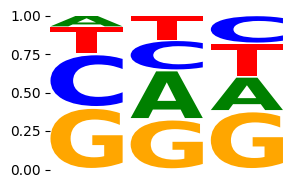

In [53]:
df_light = pd.read_csv("../../data/abasic_sites/AbasicSitesMtDNAcontext_start_light.csv", sep=";").sort_values("avg")

df_light[0] = df_light['triplet'].str.get(0).str.capitalize()
df_light[1] = df_light['triplet'].str.get(1).str.capitalize()
df_light[2] = df_light['triplet'].str.get(2).str.capitalize()
df_l = df_light.melt(['triplet', "avg"], [0, 1, 2], "pos", "nuc")

df_l_wide = df_l.groupby(["pos", "nuc"])['avg'].mean().unstack()
df_l_wide = (df_l_wide.T / df_l_wide.sum(axis=1)).T


# create Logo object
ss_logo = logomaker.Logo(df_l_wide,
                         width=.9,
                         vpad=.05,
                        #  fade_probabilities=True,
                         stack_order='small_on_top',
                         figsize=[3, 2],
                        #  color_scheme='dodgerblue',
                        #  font_name='Rosewood Std'
)

# style using Logo methods
ss_logo.style_spines(visible=False)

# style using Axes methods
ss_logo.ax.set_xticks(range(len(df_h_wide)))
# ss_logo.ax.set_xticklabels('%+d'%x for x in [-3, -2, -1, 1, 2, 3, 4, 5, 6])
ss_logo.ax.set_xticks([])
ss_logo.ax.set_yticks(np.linspace(0, 1, 5))
# ss_logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
# ss_logo.ax.set_ylabel('Frequency')
plt.savefig("../../pictures/abasic_sites/triplet_logo_l.pdf")
df_l_wide

## Look at trinucleotides precisely

In [39]:
df = df_light.merge(df_heavy, on='triplet', suffixes=['L', 'H']).sort_values('avgH')
df[['triplet', 'avgL', 'avgH']].tail(32)

,triplet,avgL,avgH
35,gCt,2.068966,4.460938
27,tGa,1.820755,4.525126
51,cAc,3.523649,4.875000
29,tGc,1.861111,4.957576
43,gTa,2.568047,4.964706
40,gAc,2.421769,5.103448
30,gTc,1.873563,5.183673
42,tGt,2.519231,5.304348
39,cTa,2.383858,5.325088
53,gAt,3.830065,5.366755


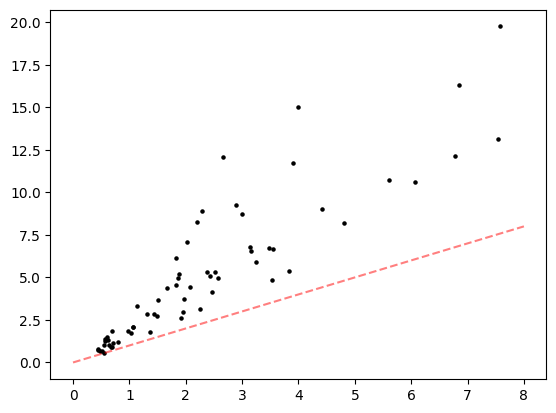

In [35]:
# just check that all right
plt.scatter(df.avgL, df.avgH, s=5, color='k')
plt.plot([0, 8], [0, 8], '--r', alpha=0.5)